In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
import glob as glob
import matplotlib.pyplot as plt
import cv2
import requests

In [3]:
os.chdir('/content/gdrive/My Drive/MTECH/Capstone/')
print("Current working directory:")
os.getcwd()

Current working directory:


'/content/gdrive/My Drive/MTECH/Capstone'

In [4]:
!pip3 install torch torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!git clone https://github.com/ultralytics/yolov5  
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15672, done.
remote: Total 15672 (delta 0), reused 0 (delta 0), pack-reused 15672
Receiving objects: 100% (15672/15672), 14.37 MiB | 12.08 MiB/s, done.
Resolving deltas: 100% (10746/10746), done.
/content/gdrive/My Drive/MTECH/Capstone/yolov5


In [6]:
%pip install -qr requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.2/585.2 kB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.1/205.1 kB 19.0 MB/s eta 0:00:00


In [7]:
import torch
import utils
from IPython import display
from IPython.display import clear_output
from pathlib import Path
import yaml
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob


%matplotlib inline
display = utils.notebook_init()

YOLOv5 🚀 2023-5-16 Python-3.10.11 torch-2.0.0+cu118 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.5/107.7 GB disk)


In [8]:
def create_data_directories(data_name):
    Path(f"../datasets/{data_name}/images/train").mkdir(parents=True, exist_ok=True)
    Path(f"../datasets/{data_name}/images/valid").mkdir(parents=True, exist_ok=True)
    Path(f"../datasets/{data_name}/images/test").mkdir(parents=True, exist_ok=True)
    Path(f"../datasets/{data_name}/labels/train").mkdir(parents=True, exist_ok=True)
    Path(f"../datasets/{data_name}/labels/valid").mkdir(parents=True, exist_ok=True)
    Path(f"../datasets/{data_name}/labels/test").mkdir(parents=True, exist_ok=True)

    
create_data_directories('occluder_data')

In [16]:
!cat data/occluder.yaml
print ('---------------------------------------------')

# Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]
path: ../datasets/occluder_data  # dataset root dir
train: images/train  # train images (relative to 'path') 128 images
val: images/train  # val images (relative to 'path') 128 images
test:  images/test # test images (optional)

# Classes

nc: 4 

names:
  0: Occ_RE
  1: Occ_LE
  2: Occ_RE_PH
  3: Occ_LE_PH---------------------------------------------


In [17]:
!python train.py --batch 10 --epochs 10 --data 'data/occluder.yaml' --weights 'yolov5s6.pt' --project 'runs_occluder' --name 'feature_extraction' --cache --freeze 12
clear_output()

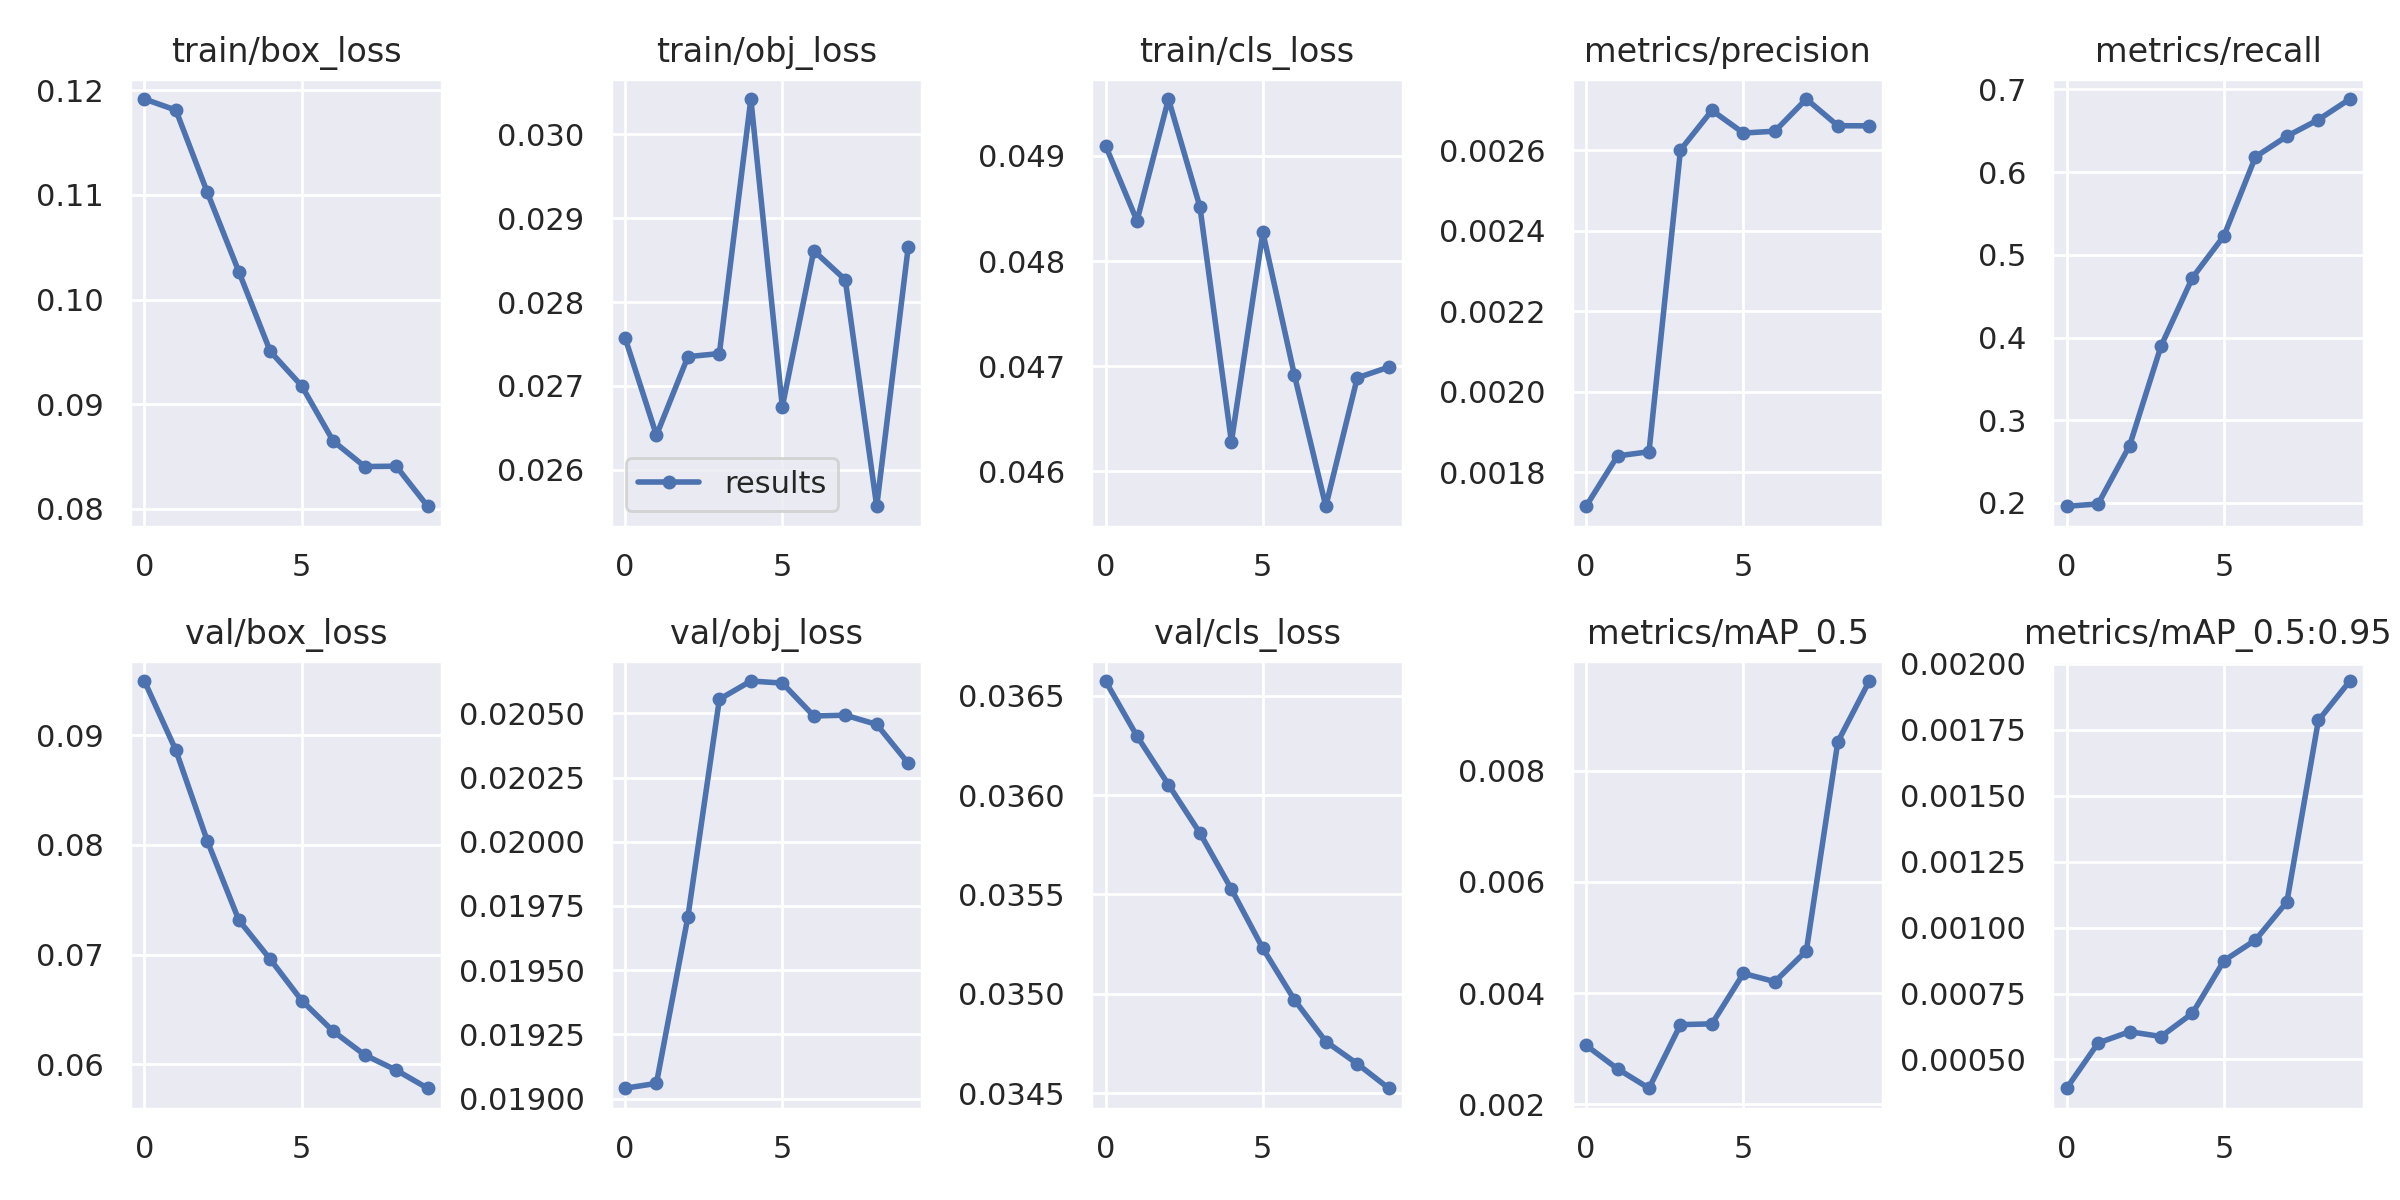

In [18]:
display.Image(f"runs_occluder/feature_extraction/results.png")

In [20]:
#!python train.py --hyp 'data/hyp.finetune.yaml' --batch 16 --epochs 10 --data 'data/occluder.yaml' --weights 'runs_occluder/feature_extraction/weights/best.pt' --project 'runs_occluder' --name 'fine-tuning' --cache
#clear_output()

train: weights=runs_occluder/feature_extraction/weights/best.pt, cfg=, data=data/occluder.yaml, hyp=data/hyp.finetune.yaml, epochs=10, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs_occluder, name=fine-tuning, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-167-g5deff14 Python-3.10.11 torch-2.0.0+cu118 CPU

hyperparameters: lr0=0.0032, lrf=0.12, momentum=0.843, weight_decay=0.00036, warmup_epochs=2.0, warmup_momentum=0.5, warmup_bias_lr=0.05, box=0.0296, cls=0.243, cls_pw=0.631, obj=0.301, obj_pw=0.911, iou_t=0.2, anchor_t=2.91, fl_gamma=0.

In [13]:
#display.Image(f"runs_occluder/fine-tuning/results.png")

didnt manage to run fine tuning, see error above.

In [23]:
!python val.py --weights 'runs_occluder/feature_extraction/weights/best.pt' --batch 64 --data 'data/occluder.yaml' --task test --project 'runs_occluder' --name 'validation_on_test_data' --augment
#clear_output()

val: data=data/occluder.yaml, weights=['runs_occluder/feature_extraction/weights/best.pt'], batch_size=64, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=True, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs_occluder, name=validation_on_test_data, exist_ok=False, half=False, dnn=False
requirements: /usr/local/lib/python3.10/dist-packages/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-167-g5deff14 Python-3.10.11 torch-2.0.0+cu118 CPU

Fusing layers... 
Model summary: 206 layers, 12319756 parameters, 0 gradients, 16.1 GFLOPs
test: Scanning /content/gdrive/MyDrive/MTECH/Capstone/datasets/occluder_data/labels/test... 40 images, 0 backgrounds, 0 corrupt: 100% 40/40 [00:14<00:00,  2.75it/s]
test: New cache created: /content/gdrive/MyDrive/MTECH/Capstone/datasets/occluder_data/labels/test.cache
                 Class     Images  Instances          P          R      mAP5

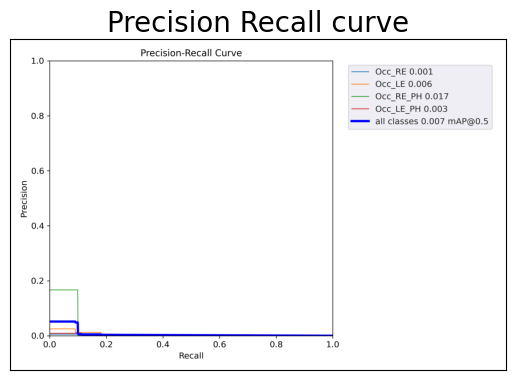

In [26]:
plt.plot(figsize=(20,20))
plt.title('Precision Recall curve', fontsize=20)
plt.tick_params(left = False, right = False , labelleft = False, labelbottom = False, bottom = False)
plt.imshow(mpimg.imread('runs_occluder/validation_on_test_data2/PR_curve.png'))

In [28]:
!python detect.py --weights 'runs_occluder/feature_extraction/weights/best.pt'  --conf 0.6 --source '../datasets/occluder_data/images/test' --project 'runs_occluder' --name 'detect_test' --augment --line=3
#clear_output()

detect: weights=['runs_occluder/feature_extraction/weights/best.pt'], source=../datasets/occluder_data/images/test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.6, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=True, visualize=False, update=False, project=runs_occluder, name=detect_test, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /usr/local/lib/python3.10/dist-packages/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-167-g5deff14 Python-3.10.11 torch-2.0.0+cu118 CPU

Fusing layers... 
Model summary: 206 layers, 12319756 parameters, 0 gradients, 16.1 GFLOPs
image 1/40 /content/gdrive/MyDrive/MTECH/Capstone/datasets/occluder_data/images/test/IMG-0803.jpg: 640x512 (no detections), 729.5ms
image 2/40 /content/gdrive/MyDrive/MTECH/Capstone/datasets/occluder_data/images/test/IMG-0804.jpg

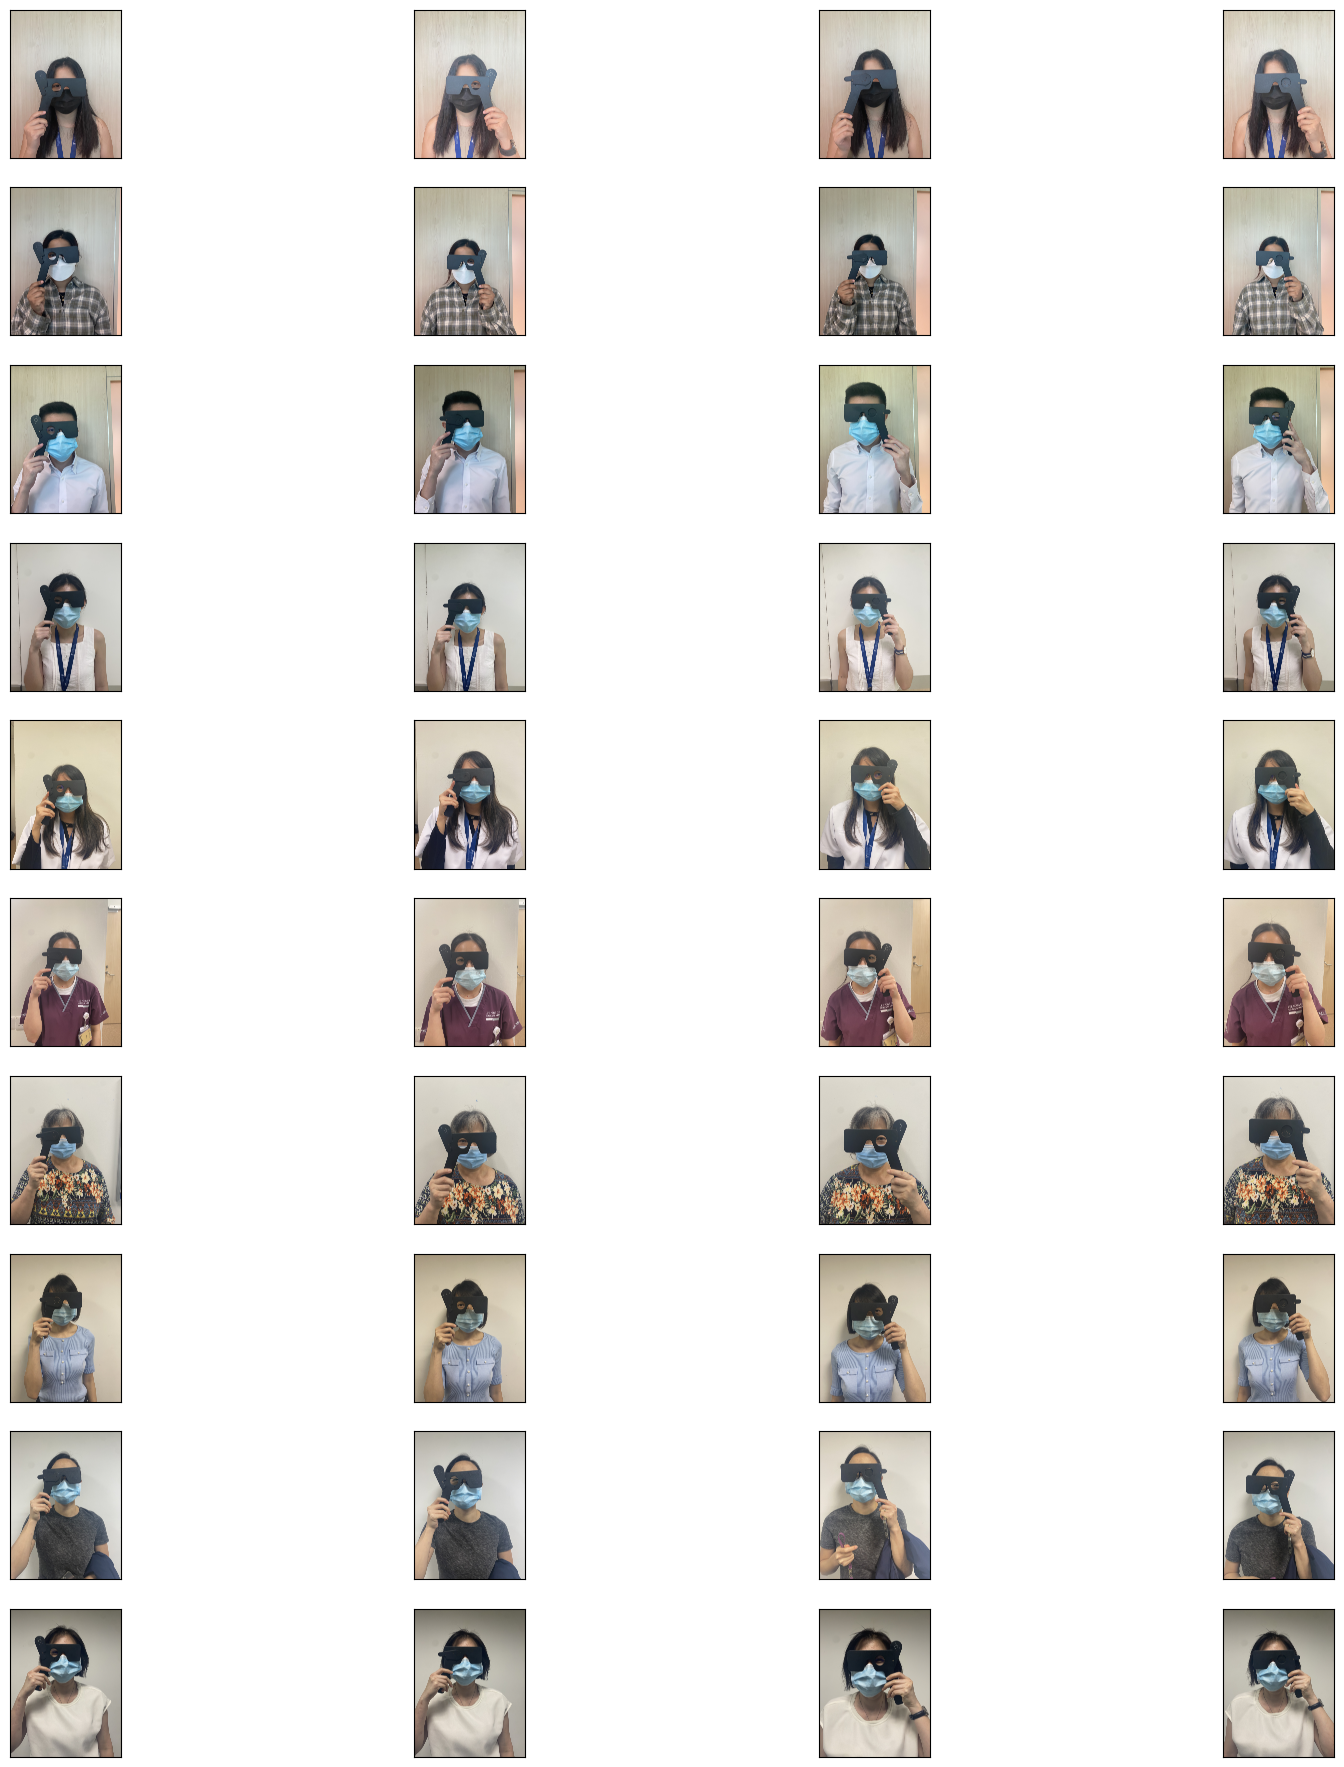

In [29]:
detect_path = r'runs_occluder/detect_test2'

images = []
for img_path in glob.glob(detect_path + '/*.jpg'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,25))
columns = 4
for i, image in enumerate(images):
    plt.subplot((int(len(images) / columns + 1)), columns, i + 1)
    plt.tick_params(left = False, right = False , labelleft = False, labelbottom = False, bottom = False)
    plt.imshow(image)

https://towardsdatascience.com/the-practical-guide-for-object-detection-with-yolov5-algorithm-74c04aac4843